In [1]:
#Connecting to google drive
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Uploading our BloodMNIST Dataset from local computer
from google.colab import files
uploaded = files.upload()

Saving bloodmnist.npz to bloodmnist.npz


In [3]:
#Libraries to load and display dataset
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from skimage.util import montage

#libraries to build our neural netwrok model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as k

#librariy to augment our dataset images
from keras.preprocessing.image import ImageDataGenerator

#libraries to calculate evalution scores of our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#to display our images and run eagerly our nueral model
%matplotlib inline 
tf.config.run_functions_eagerly(True)

In [4]:
#Loading our dataset
blood_dataset = np.load("bloodmnist.npz")

#iterating on our dataset to see the keys
for i in blood_dataset.iterkeys():
  print(i)

train_images
train_labels
val_images
val_labels
test_images
test_labels


<ipython-input-4-48109ff3c2b4>:5: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  for i in blood_dataset.iterkeys():


In [5]:
#Storing our values from the keys of the dictionary to a variable
x_train_blood_cnn = blood_dataset['train_images']
x_test_blood_cnn = blood_dataset['test_images']
y_train_blood_cnn = blood_dataset['train_labels']
y_test_blood_cnn = blood_dataset['test_labels']
val_images_blood_cnn = blood_dataset['val_images']
val_labels_blood_cnn = blood_dataset['val_labels']

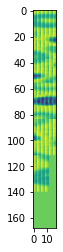

In [6]:
#Visualising our dataset using montage function
blood_dataset_montage = montage(x_train_blood_cnn[0])
plt.imshow(blood_dataset_montage)
plt.show()

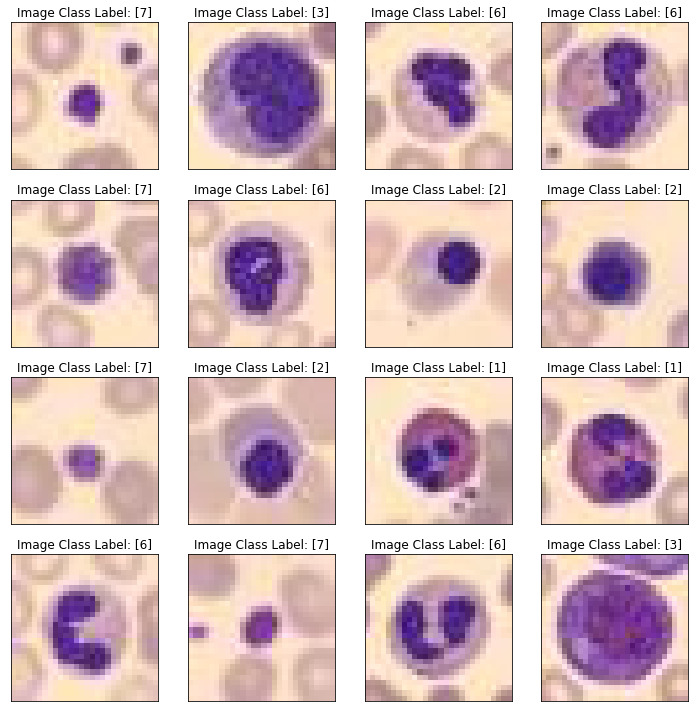

In [7]:
#Visualising Images and Classes
from numpy.ma.extras import column_stack
display_images = x_train_blood_cnn  
display_labels = y_train_blood_cnn  

# Define the number of rows and columns for displaying images
rows = 4
cols = 4
num_images = rows * cols

# Create a figure object with specified size and display the images
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(display_images[i])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Image Class Label: {display_labels[i]}')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
#checking the shape of our data.
print(x_train_blood_cnn.shape)
print(x_test_blood_cnn.shape)
print(y_train_blood_cnn.shape)
print(y_test_blood_cnn.shape)

(11959, 28, 28, 3)
(3421, 28, 28, 3)
(11959, 1)
(3421, 1)


In [9]:
#transforming our data into float
x_train_blood_cnn = x_train_blood_cnn.astype('float32')
x_test_blood_cnn = x_test_blood_cnn.astype('float32')
val_images_blood_cnn = val_images_blood_cnn.astype('float32')

#converting our values from range[0,255] to range[0,1]
x_train_blood_cnn /= 255.0
x_test_blood_cnn /= 255.0
val_images_blood_cnn /= 255.0

In [10]:
#Tranforming our data to categorically.
y_train_blood_cnn = tf.keras.utils.to_categorical(y_train_blood_cnn, num_classes=8, dtype='float32')
y_test_blood_cnn = tf.keras.utils.to_categorical(y_test_blood_cnn, num_classes=8, dtype='float32')

In [11]:
#https://github.com/MedMNIST/MedMNIST/blob/main/medmnist/info.py
#labels for blood dataset from the above link
class_labels = [
    "basophil",
    "eosinophil",
    "erythroblast",
    "immature granulocytes(myelocytes, metamyelocytes and promyelocytes)",
    "lymphocyte",
    "monocyte",
    "neutrophil",
    "platelet"
]

In [12]:
#building our Nueral network model
network = Sequential()

#adding layers to our model
network.add(Conv2D(32, (3,3),padding="same",activation="relu", input_shape=(28,28,3)))
network.add(Conv2D(32,(3,3),activation = "relu"))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.25))

network.add(Conv2D(64,(3,3),padding="same",activation="relu"))
network.add(Conv2D(64,(3,3),activation="relu"))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.25))

network.add(Flatten())
network.add(Dense(512, activation = "relu"))
network.add(Dropout(0.5))
network.add(Dense(8, activation="softmax"))

#plotting the summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                        

In [13]:
#Compiling our built neural network model to get accuracy and measure loss.
network.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
    )

In [14]:
#fitting our neural network model to our dataset.
network.fit(
    x_train_blood_cnn,
    y_train_blood_cnn,
    batch_size=32,
    epochs=5,
    validation_data=(x_test_blood_cnn,y_test_blood_cnn),
    shuffle=True
    )


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
374/374 [==============================] - 33s 64ms/step - loss: 1.0250 - accuracy: 0.6064 - val_loss: 0.5651 - val_accuracy: 0.7776
Epoch 2/5
374/374 [==============================] - 25s 66ms/step - loss: 0.5745 - accuracy: 0.7871 - val_loss: 0.4344 - val_accuracy: 0.8442
Epoch 3/5
374/374 [==============================] - 25s 66ms/step - loss: 0.4822 - accuracy: 0.8206 - val_loss: 0.4121 - val_accuracy: 0.8568
Epoch 4/5
374/374 [==============================] - 24s 64ms/step - loss: 0.4232 - accuracy: 0.8469 - val_loss: 0.3814 - val_accuracy: 0.8761
Epoch 5/5
374/374 [==============================] - 23s 62ms/step - loss: 0.3708 - accuracy: 0.8642 - val_loss: 0.3097 - val_accuracy: 0.8886


In [15]:
network.save("/content/drive/MyDrive/BLOOD_CNN.h5")

In [16]:
#creating our confusion matrix for our dataset 
y_pred_blood_cnn = network.predict(x_test_blood_cnn) 
y_pred_blood_cnn = np.argmax(y_pred_blood_cnn, axis=1)
y_test_blood_cnn = np.argmax(y_test_blood_cnn, axis=1)
cm = confusion_matrix(y_test_blood_cnn, y_pred_blood_cnn)
print(cm)

107/107 [==============================] - 1s 8ms/step
[[196   1   1  19   4  20   3   0]
 [  4 611   0   0   1   4   4   0]
 [  3   0 277  14   7   0   7   3]
 [ 44   1  14 404  18  48  50   0]
 [  9   0   5  14 213   1   1   0]
 [ 17   0   1  39   3 223   1   0]
 [  0   1   2   5   2   2 654   0]
 [  0   0   7   0   1   0   0 462]]


In [17]:
#Evaluation scores
precision = precision_score(y_test_blood_cnn, y_pred_blood_cnn,average = 'macro')
accuracy = balanced_accuracy_score(y_test_blood_cnn, y_pred_blood_cnn)
recall = recall_score(y_test_blood_cnn, y_pred_blood_cnn,average = 'macro')
f1 = f1_score(y_test_blood_cnn, y_pred_blood_cnn,average = 'macro')

print("The precision score for Blood Dataset CNN Model is: ", precision)
print("The accuracy score for Blood Dataset CNN Model is: ", accuracy)
print("The recall score for Blood Dataset CNN Model is: ", recall)
print("The f1 score for Blood Dataset CNN Model is: ", f1)

The precision score for Blood Dataset CNN Model is:  0.8671412532182816
The accuracy score for Blood Dataset CNN Model is:  0.8746988160981811
The recall score for Blood Dataset CNN Model is:  0.8746988160981811
The f1 score for Blood Dataset CNN Model is:  0.8697749035552642


In [18]:
#Validating our data by passing validation dataset into our trained neural network model
for i in range(10):
  val_img = val_images_blood_cnn[i]
  img = tf.expand_dims(val_img, axis=0)
  results = network.predict(img)
  single_result = results[0]
  most_likely = int(np.argmax(single_result))
  class_likely = single_result[most_likely]
  class_label = class_labels[most_likely]
  print("This image is {} - Likelihood: {:2f}".format(class_label,class_likely))

1/1 [==============================] - 0s 119ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


This image is lymphocyte - Likelihood: 0.735895
1/1 [==============================] - 0s 22ms/step
This image is basophil - Likelihood: 0.895105
1/1 [==============================] - 0s 24ms/step
This image is platelet - Likelihood: 0.999713
1/1 [==============================] - 0s 26ms/step
This image is monocyte - Likelihood: 0.918865
1/1 [==============================] - 0s 26ms/step
This image is eosinophil - Likelihood: 1.000000
1/1 [==============================] - 0s 22ms/step
This image is neutrophil - Likelihood: 0.978160
1/1 [==============================] - 0s 22ms/step
This image is eosinophil - Likelihood: 0.999999
1/1 [==============================] - 0s 22ms/step
This image is platelet - Likelihood: 0.999999
1/1 [==============================] - 0s 22ms/step
This image is neutrophil - Likelihood: 0.999926
1/1 [==============================] - 0s 25ms/step
This image is monocyte - Likelihood: 0.830714
